<a href="https://colab.research.google.com/github/LuccaRomagnolli/Machine-Learning/blob/main/Risk_Prev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação do Dataset

In [ ]:
!pip install gdown
!gdown --id 1kyDCYM08baeTR340AXlwZPDDiu-3c6KQ -O dataset.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kyDCYM08baeTR340AXlwZPDDiu-3c6KQ
To: /content/dataset.csv
100% 359k/359k [00:00<00:00, 109MB/s]


## Importação das Bibliotecas

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, average_precision_score,confusion_matrix
)
import joblib

## Análise prévia da base de dados

In [ ]:
# Quantidade de variáveis
df = pd.read_csv('dataset.csv')
print(df.columns.size)
print(len(df))

28
1000


In [ ]:
# Analize da variável alvo (output)

df.Risk_Level.value_counts()

,count
Risk_Level,
High,502
Medium,342
Low,156


In [ ]:
# Verificação do data type das variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project_ID             1000 non-null   object 
 1   Project_Type           1000 non-null   object 
 2   Location               1000 non-null   object 
 3   Start_Date             1000 non-null   object 
 4   End_Date               1000 non-null   object 
 5   Planned_Cost           1000 non-null   int64  
 6   Actual_Cost            1000 non-null   float64
 7   Cost_Overrun           1000 non-null   float64
 8   Planned_Duration       1000 non-null   int64  
 9   Actual_Duration        1000 non-null   float64
 10  Schedule_Deviation     1000 non-null   float64
 11  Vibration_Level        1000 non-null   float64
 12  Crack_Width            1000 non-null   float64
 13  Load_Bearing_Capacity  1000 non-null   float64
 14  Temperature            1000 non-null   float64
 15  Humid

In [ ]:
# Dados estatísticos

df.describe()

,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,...,Air_Quality_Index,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.641509e+07,3.154108e+07,5.125992e+06,538.620000,645.560751,106.940751,1.044378,2.456479,266.048158,17.114051,...,174.774000,27403.792411,543.398105,5395.218000,69.450583,4.567000,5.332856,74.921977,0.197000,55.177819
std,1.448576e+07,1.809596e+07,5.931350e+06,204.531765,269.383932,110.387587,0.550466,1.427987,129.086130,15.313816,...,72.247288,13009.214171,263.353703,2617.169193,17.362814,2.878854,2.562920,14.609702,0.397931,25.819995
min,1.045475e+06,1.180252e+06,-4.648579e+06,180.000000,165.278211,-79.136491,0.107445,0.001205,50.109320,-9.997095,...,50.000000,5054.162626,101.200276,1001.000000,40.018584,0.000000,1.003808,50.042865,0.000000,10.092638
25%,1.431013e+07,1.609655e+07,5.810661e+05,361.000000,424.252757,22.402402,0.566882,1.223689,153.964696,4.578246,...,112.750000,16153.645310,311.349628,3154.750000,54.154924,2.000000,3.060915,62.125838,0.000000,32.525960
50%,2.690860e+07,3.133922e+07,3.326817e+06,535.500000,635.469136,84.056607,1.041774,2.419953,255.503722,17.194831,...,177.000000,27042.803203,534.187419,5371.000000,69.527802,5.000000,5.338494,74.878671,0.000000,55.307694
75%,3.957029e+07,4.532747e+07,8.665132e+06,713.000000,831.644950,173.954216,1.535026,3.659447,373.418830,29.868439,...,236.000000,38909.340766,773.811921,7616.500000,84.777974,7.000000,7.488645,87.529693,0.000000,78.197237
max,4.996854e+07,7.251939e+07,2.401229e+07,899.000000,1340.352531,446.352531,1.998975,4.996036,498.507475,44.923953,...,299.000000,49941.431683,998.960344,9997.000000,99.995490,9.000000,9.966444,99.984742,1.000000,99.953443


## Preprocessamento

### i) Processamento das variáveis de entrada:

In [ ]:
# @title
# Definição da variável alvo e dos inputs
y = df['Risk_Level']
X = df.drop(['Risk_Level'], axis=1)


# Definição das colunas categóricas de numéricas
categorical_columns = ['Project_Type', 'Location', 'Weather_Condition']
numerical_columns = [col for col in X.columns if col not in categorical_columns]

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


# Remoção de colunas insignificantes
columns_to_remove = ['Project_ID', 'Start_Date', 'End_Date']
numerical_columns = [col for col in numerical_columns if col not in columns_to_remove]




preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)


X_processed = preprocessor.fit_transform(X)

# Extração do nome das variáveis
feature_names = (numerical_columns +
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)))

# Criação de um Dataframe para visualização dos dados transformados
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

print(f"Original shape: {X.shape}")
print(f"Processed shape: {X_processed_df.shape}")
print("\nFirst few rows of processed data:")

X_processed_df.head()


Categorical columns: ['Project_Type', 'Location', 'Weather_Condition']
Numerical columns: ['Project_ID', 'Start_Date', 'End_Date', 'Planned_Cost', 'Actual_Cost', 'Cost_Overrun', 'Planned_Duration', 'Actual_Duration', 'Schedule_Deviation', 'Vibration_Level', 'Crack_Width', 'Load_Bearing_Capacity', 'Temperature', 'Humidity', 'Air_Quality_Index', 'Energy_Consumption', 'Material_Usage', 'Labor_Hours', 'Equipment_Utilization', 'Accident_Count', 'Safety_Risk_Score', 'Image_Analysis_Score', 'Anomaly_Detected', 'Completion_Percentage']
Original shape: (1000, 27)
Processed shape: (1000, 36)

First few rows of processed data:


,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,...,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_Seattle,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Stormy,Weather_Condition_Sunny
0,-0.977607,-0.911520,-0.393408,0.784525,0.625272,0.072273,0.890226,0.247259,1.590038,0.093263,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.660792,-1.549962,-0.672732,-1.318890,-0.971006,0.074117,-0.647773,0.874350,0.690636,0.405244,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.215167,-0.544535,-1.135832,1.762857,1.620124,0.687352,-0.169453,0.597519,-0.229068,1.688459,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.132319,-0.114526,-0.026253,1.322608,1.221935,0.531348,-0.316220,-0.475613,0.730438,0.346713,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.703566,-1.615077,-0.766925,-0.903099,-1.105187,-1.023731,1.681946,1.112481,-0.474784,-0.078371,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### ii) Processamento da variável de saída

In [ ]:
from sklearn.preprocessing import LabelEncoder

# O principal objetivo nessa etapa é transformar as variáveis algo em uma sequência numérica

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


## Criação dos modelos base

### 1. `Random Forest Classifier`

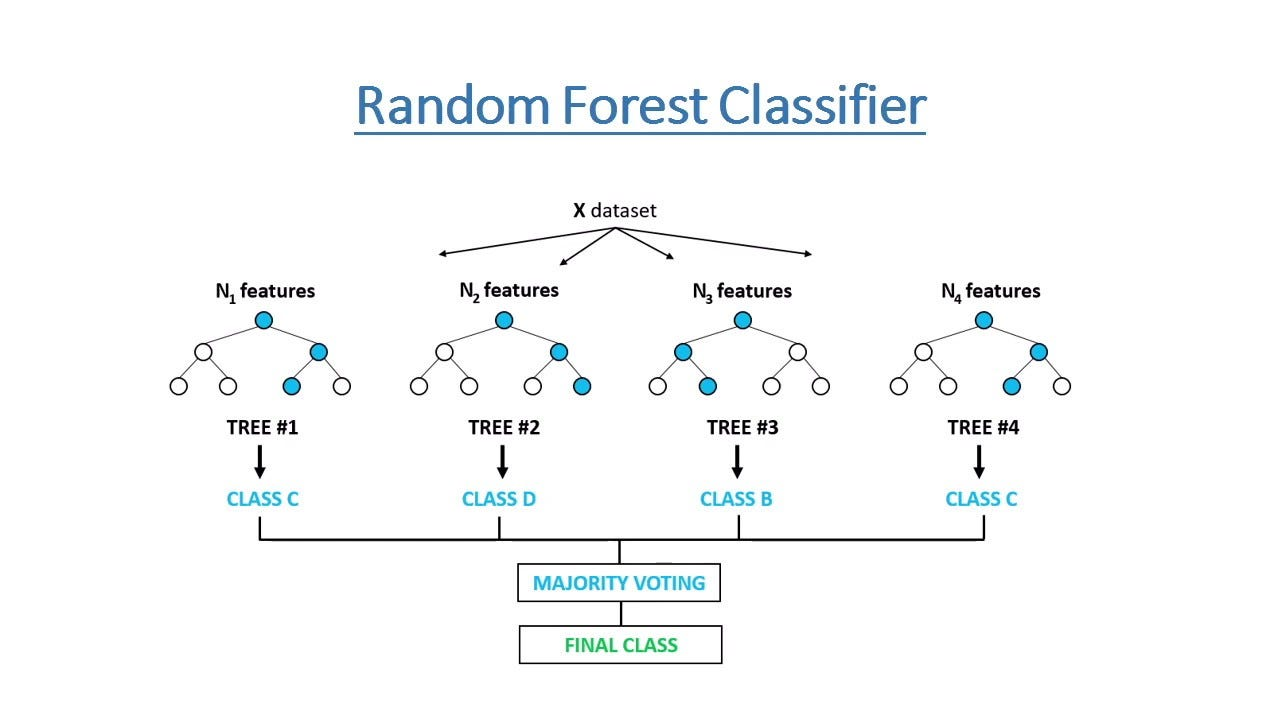

In [ ]:
# @title
Xtest, Xtrain, ytest, ytrain = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Random Forest
rft = RandomForestClassifier(n_estimators=100,
                               random_state=42,

                               )
rft.fit(Xtrain, ytrain)

y_pred = rft.predict(Xtest)

print("\nRelatório de Classificação:\n", classification_report(ytest, y_pred))




Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       395
           1       0.88      0.54      0.67       127
           2       0.75      0.87      0.80       278

    accuracy                           0.85       800
   macro avg       0.85      0.78      0.80       800
weighted avg       0.86      0.85      0.85       800



### `Gradient Boosting Classifier`

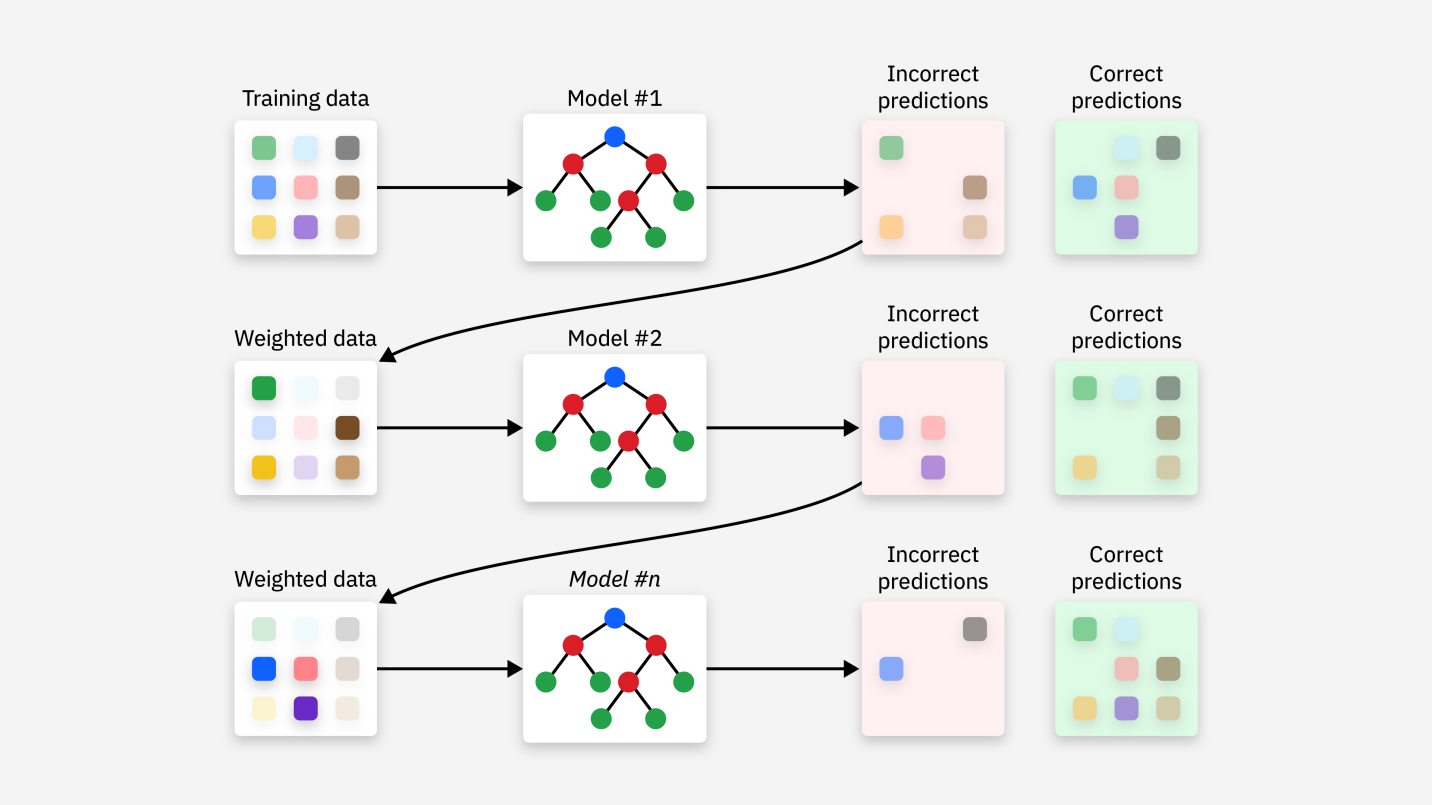

In [ ]:
# Gradient Boosting Classifier

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)


gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.92      0.83      0.87        29
           2       0.90      0.94      0.92        64

    accuracy                           0.94       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.95      0.94      0.94       200



## Resultados

### Análise da influência das variáveis de entrada
---



Como visto anteriormente o modelo base de melhor acurácia foi o
`Gradient Boosting Classifier`, logo será o modelo escolhido para a aplicação

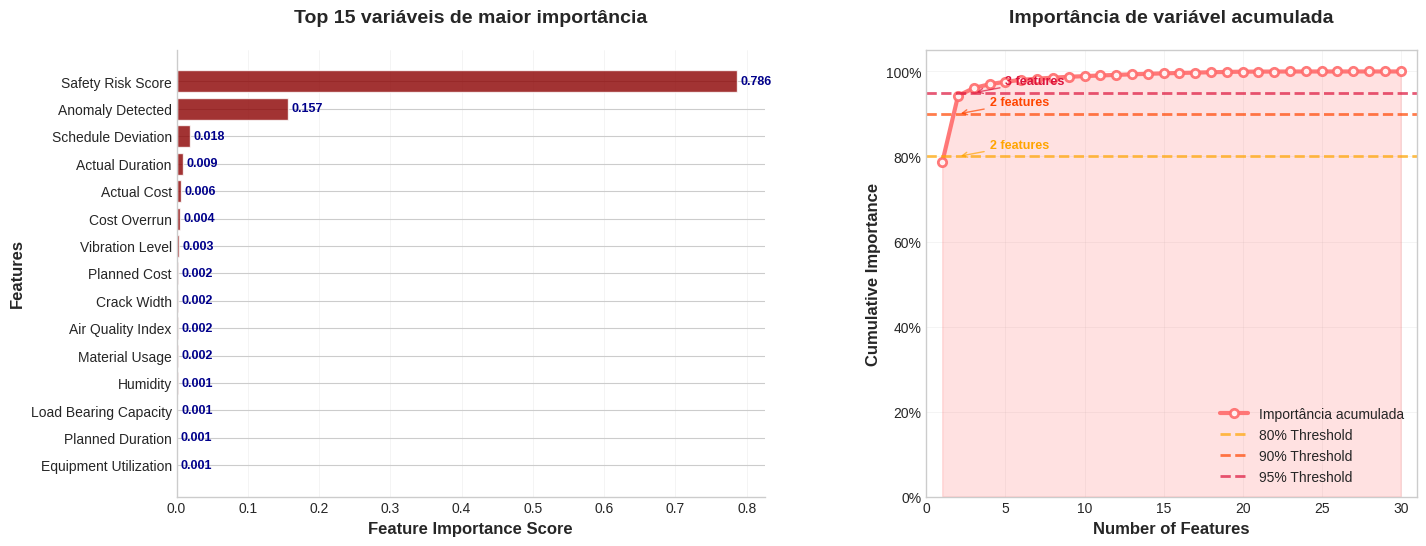

In [ ]:
# @title
# Extraindo o nome das features

feature_names = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': gbc.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

# Calculo da importância comulativa
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Modelo do seaborn
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Criação da figura que vai conter os DataFrames
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], width_ratios=[1.2, 1],
                      hspace=0.3, wspace=0.3)

# Plot 1: As 15 features de maior importância (improved)
ax1 = fig.add_subplot(gs[0, 0])
top_15 = feature_importance.head(15)

# Gradiente de cores
# colors = plt.cm.plasma(np.linspace(0, 0.8, len(top_15)))
colors = ['darkred'] * len(top_15) # Changed color to dark red
bars = ax1.barh(range(len(top_15)), top_15['importance'], color=colors,
                alpha=0.8, edgecolor='white', linewidth=1)

# Ajeitando a estética do eixo Y
y_labels = [label.replace('_', ' ').title() for label in top_15['feature']]
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(y_labels, fontsize=10, fontweight='medium')

# Adicionando etiquetas de valor no gráfico
for i, (val, bar) in enumerate(zip(top_15['importance'], bars)):
    ax1.text(val + 0.005, i, f'{val:.3f}', va='center',
             fontsize=9, fontweight='bold', color='darkblue')

# Customização e formatação dos eixo [X,Y]
ax1.set_xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
ax1.set_ylabel('Features', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 variáveis de maior importância', fontsize=14, fontweight='bold', pad=20)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot 2: Curva da importância acumulada (improved)
ax2 = fig.add_subplot(gs[0, 1])
top_n = min(30, len(feature_importance))
cumsum_data = feature_importance.head(top_n)
x_range = range(1, len(cumsum_data) + 1)

# Adicionando um gradiente de cores a curva
ax2.plot(x_range, cumsum_data['cumulative_importance'],
         marker='o', linewidth=3, markersize=6,
         color='#FF6B6B', markerfacecolor='white', markeredgewidth=2,
         markeredgecolor='#FF6B6B', alpha=0.9, label='Importância acumulada')

# Adaptação dos limites do gráfico para melhorar a estética
thresholds = [0.8, 0.9, 0.95]
colors_threshold = ['#FFA500', '#FF4500', '#DC143C']
for i, (threshold, color) in enumerate(zip(thresholds, colors_threshold)):
    ax2.axhline(y=threshold, color=color, linestyle='--', linewidth=2,
                alpha=0.7, label=f'{threshold:.0%} Threshold')
    n_features = (cumsum_data['cumulative_importance'] >= threshold).argmax() + 1
    if n_features > 0:
        ax2.annotate(f'{n_features} features',
                    xy=(n_features, threshold), xytext=(n_features+2, threshold+0.02),
                    arrowprops=dict(arrowstyle='->', color=color, alpha=0.7),
                    fontsize=9, fontweight='bold', color=color)

# Colorir integral da curva
ax2.fill_between(x_range, cumsum_data['cumulative_importance'],
                 alpha=0.2, color='#FF6B6B')

# Customização e formatação dos eixos
ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
ax2.set_title('Importância de variável acumulada', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_xlim(0, len(cumsum_data) + 1)
ax2.set_ylim(0, 1.05)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Edição das legendas
ax2.legend(loc='lower right', fontsize=10, framealpha=0.9,
           fancybox=True, shadow=True)


# Melhorando a apresentação das colunas
top_20 = feature_importance.head(20).copy()
top_20.insert(0, 'Rank', range(1, 21))
top_20['importance_pct'] = top_20['importance'].apply(lambda x: f"{x:.2%}")
top_20['cumulative_pct'] = top_20['cumulative_importance'].apply(lambda x: f"{x:.2%}")

#### Logo, podemos inferir que as variáveis determinantes para classificação e que podem influenciar o nível de segurança são:
- `Safety Risk Score`
- `Anomaly Detected:`
- `Actual Duration:`

#### As demais variáveis - por possuirem uma baixa correlação - podem ser descartadas em próximos experimentos devido a sua baixa importância global.

###  📈 Interpretação da Curva ROC

A ROC Curve (Receiver Operating Characteristic) mostra a capacidade de um modelo de classificação em distinguir entre as classes.


---



Eixo X (False Positive Rate - FPR): proporção de falsos positivos.


Eixo Y (True Positive Rate - TPR): proporção de verdadeiros positivos (também chamado de recall).


Linha diagonal: representa um modelo aleatório (sem poder de discriminação).


Quanto mais a curva se aproxima do canto superior esquerdo, melhor o desempenho do modelo.


---




`AUC (Area Under the Curve): mede a área sob a curva ROC.`

AUC = 1 → modelo perfeito

AUC = 0.5 → modelo aleatório

AUC < 0.5 → modelo pior que o acaso

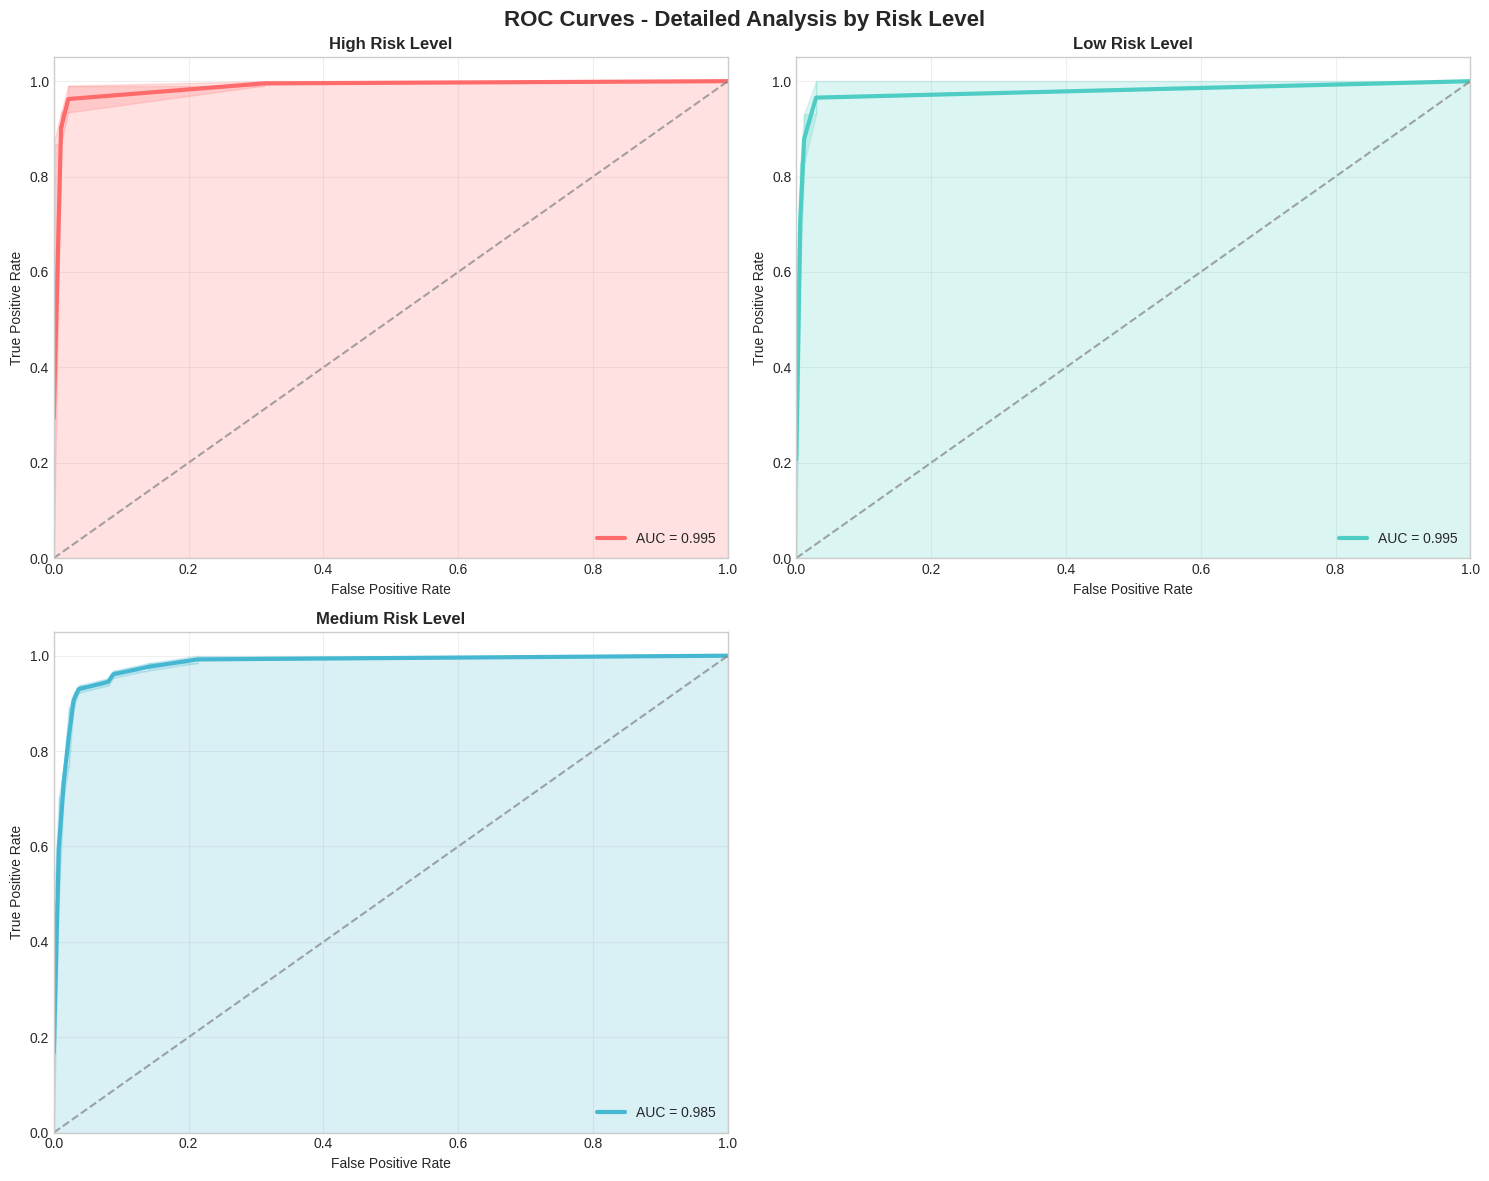

In [ ]:
# @title

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Binarize the output for multiclass ROC
# Use y_test from the previous split
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Get probability predictions
y_pred_proba = gbc.predict_proba(X_test)

# Check shape compatibility
if y_test_bin.shape[0] != y_pred_proba.shape[0]:
    print("Error: Mismatch between true labels and prediction probabilities shape.")
else:
    # Get class names
    class_names = label_encoder.classes_

    # Versão com subplots separados para cada classe
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ROC Curves - Detailed Analysis by Risk Level',
                 fontsize=16, fontweight='bold', y=0.98)

    # Flatten axes para facilitar iteração
    axes = axes.ravel()

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for i in range(n_classes):
        if i < len(axes):
            # ROC curve para classe específica
            # Ensure to use the binarized true labels for the specific class
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)

            # Plot principal
            sns.lineplot(x=fpr, y=tpr, ax=axes[i],
                        color=colors[i % len(colors)],
                        linewidth=3,
                        label=f'AUC = {roc_auc:.3f}')

            # Linha diagonal
            sns.lineplot(x=[0, 1], y=[0, 1], ax=axes[i],
                        linestyle='--', color='gray', alpha=0.7)

            # Preenchimento da área
            axes[i].fill_between(fpr, tpr, alpha=0.2, color=colors[i % len(colors)])

            # Formatação
            axes[i].set_title(f'{class_names[i]} Risk Level', fontweight='bold')
            axes[i].set_xlabel('False Positive Rate')
            axes[i].set_ylabel('True Positive Rate')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
            axes[i].set_xlim([0.0, 1.0])
            axes[i].set_ylim([0.0, 1.05])

    # Remover subplot vazio se necessário
    if n_classes < len(axes):
        for j in range(n_classes, len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

###🔁 Influência da disposição dos dados na perfomance do modelo (cross-validation)

#### A Cross-Validation é usada para avaliar o desempenho de um modelo de forma mais confiável.


---



- O conjunto de dados é dividido em “k” partes (folds).

- O modelo é treinado em (k−1) partes e testado na parte restante.
  Esse processo se repete k vezes, trocando o conjunto de teste a cada iteração.

- O resultado final é a média das métricas obtidas em cada rodada.


---


#### ***Vantagem***: reduz o risco de o modelo se ajustar demais a um único conjunto de dados (overfitting) e fornece uma avaliação mais estável do desempenho.

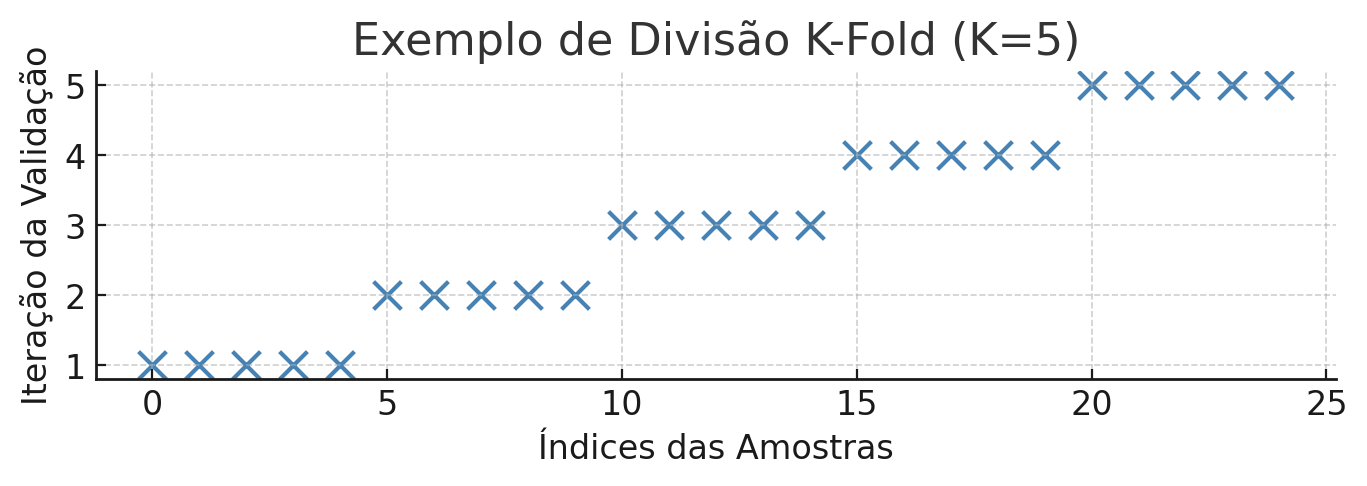

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define o gerador de folds com semente fixa
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Executa a cross-validation com reprodutibilidade
cv_scores = cross_val_score(gbc, X_processed, y_encoded, cv=kf, scoring='accuracy')

# Exibe os resultados
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation scores: [0.93 0.98 0.94 0.94 0.93 0.97 0.99 0.97 0.95 0.95]
Mean accuracy: 0.9549999999999998
Standard deviation: 0.0201246117974981


In [ ]:
# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the results
print(f"Mean cross-validation accuracy: {mean_cv_score:.3f}")
print(f"Standard deviation of cross-validation accuracy: {std_cv_score:.3f}")

Mean cross-validation accuracy: 0.955
Standard deviation of cross-validation accuracy: 0.020


#### Resumo:


#### Principais Resultados da Análise de Dados:

A validação cruzada (cross-validation) foi realizada usando K-Fold com k=5.

- As acurácias obtidas nos 5 folds foram: [0.93, 0.98, 0.94, 0.94, 0.93, 0.9   97,   0.99, 0.97, 0.95, 0.95]

- A acurácia média da validação cruzada foi de aproximadamente 0.955.

- O desvio padrão da acurácia foi de aproximadamente 0,02.


---


#### Insights e Próximos Passos:

O baixo desvio padrão (0,02) indica que o desempenho do modelo é consistente entre os diferentes subconjuntos dos dados.